In [106]:
import scipy.io
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import webrtcvad
import glob

In [100]:
## The Frame class and frame generator methods have been used in multiple open source audio processing work such as 
## https://ngbala6.medium.com/audio-processing-and-remove-silence-using-python-a7fe1552007a
class Frame(object):
    """Represents a "frame" of audio data."""
    def __init__(self, bytes, timestamp, duration):
        self.bytes = bytes
        self.timestamp = timestamp
        self.duration = duration


def frame_generator(frame_duration_ms, audio, sample_rate):
    """Generates audio frames from PCM audio data.
    Takes the desired frame duration in milliseconds, the PCM data, and
    the sample rate.
    Yields Frames of the requested duration.
    """
    n = int(sample_rate * (frame_duration_ms / 1000.0) * 2)
    offset = 0
    timestamp = 0.0
    duration = (float(n) / sample_rate) / 2.0
    while offset + n < len(audio):
        yield Frame(audio[offset:offset + n], timestamp, duration)
        timestamp += duration
        offset += n

In [101]:
# Plot the amplitude waveform (Scipy tutorials)
def plot_amplitude_waveform(length, data):
    """Generates the amplitude waveform versus time
    """
    time = np.linspace(0., length, data.shape[0])
    plt.plot(time, data[:], label="Human Speech")
    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

In [112]:
# Using Google VAD for Voice Activity Detection and plot the Speeech activity graph
def detect_speech(frames, sample_rate, file_name, target_directory):
    """Detects speech and saves the plot of speech activity for each frame
    """
    
    vad = webrtcvad.Vad()
    has_speech = list()
    for i in range(0, len(frames)):
        speech_activity = vad.is_speech(frames[i].bytes, sample_rate)
        if speech_activity:
            has_speech.append(1)
        else:
            has_speech.append(0)
    
    frame_pos = [i+1 for i in range(0, len(has_speech))]
    plt.plot(frame_pos, has_speech, label="Human Speech")
    plt.legend()
    plt.xlabel("Audio Frame")
    plt.ylabel("Speech Activity")
    file_name = file_name.split(".")[0]
    plt.savefig(target_directory + file_name + ".jpg")
    plt.show()

<ipython-input-113-508ef9dc4652>:16: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(audio_file)


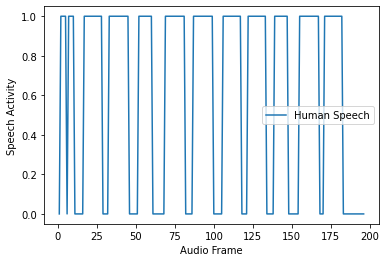

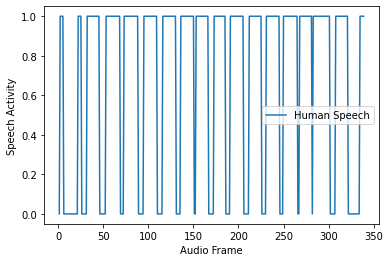

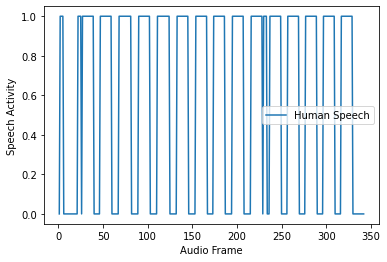

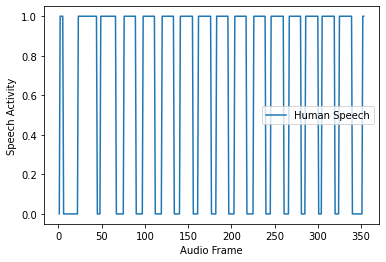

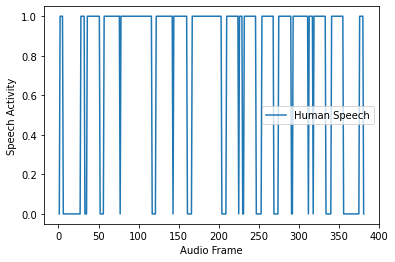

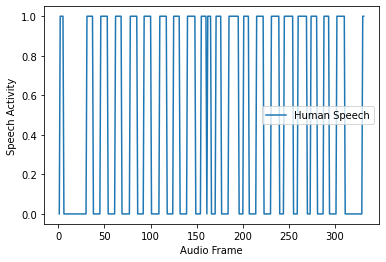

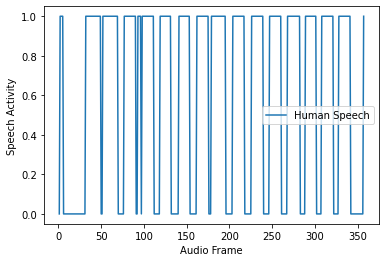

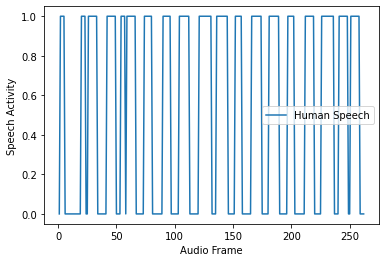

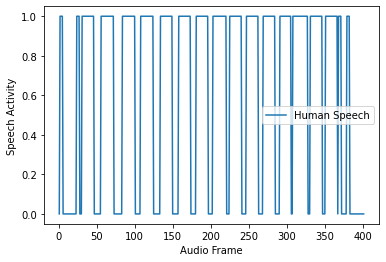

In [113]:
# Length denotes the duration of time and frames is a list of Frame objects obtained from our audio data
# Upon reading the wav file we obtain the data which is a numpy list containing the audio samples as well as the sample rate
# The frame duration is restricted to certain values such as 10ms and 30ms
# The directory needs to be changed and perhaps read from a configuration file prior to pushing this to production.

wav_files = list()
for file in glob.glob("Professor_Sounds/*.wav"):
    wav_files.append(file)

    
frame_duration_ms = 30
# The directory to save the graph
target_directory = "Professor_Sounds_Graph/"
for audio_file in wav_files:

    sample_rate, data = wavfile.read(audio_file)
    length = data.shape[0] / sample_rate
    #plot_amplitude_waveform(length, data)
    frames = frame_generator(frame_duration_ms, data, sample_rate)
    frames = list(frames)
    file_name = audio_file.split("/")[1]
    detect_speech(frames, sample_rate, file_name, target_directory)